In [1]:
import pandas as pd
import numpy as np
from modulos.eda import *
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
pd.set_option('display.max_columns', None)

## 1. Carga de datos

### a. External Database

Este dataset contiene información complementaria obtenida de fuentes externas al CIBIl. Refleja indicadores financieros individuales capaces de optimizar el modelo. A continuación se deja una breve descripción de todas las variables:

**PROPECTID**: Un identificador único asignado a cada cliente.

**time_since_recent_payment**: Indica el tiempo transcurrido desde que el cliente realizó su último pago.

**time_since_first_deliquency**: Muestra el tiempo transcurrido desde la primera vez que el cliente se atrasó en un pago.

**time_since_recent_deliquency**: Indica el tiempo transcurrido desde la última vez que el cliente se atrasó en un pago.

**num_times_delinquent**: Cuenta el número total de veces que el cliente ha incumplido con sus pagos.

**max_delinquency_level**: Muestra el nivel máximo de morosidad alcanzado por el cliente (por ejemplo, 90 días de retraso).

**max_recent_level_of_deliq**: Indica el nivel máximo de morosidad en el período más reciente.

**num_deliq_6mts, num_deliq_12mts, num_deliq_6_12mts**: Cuentan el número de incumplimientos en los últimos 6 meses, 12 meses y entre 6 y 12 meses, respectivamente.

**max_deliq_6mts, max_deliq_12mts**: Muestran el nivel máximo de morosidad en los últimos 6 y 12 meses, respectivamente.

**num_times_30p_dpd, num_times_60p_dpd**: Cuentan el número de veces que el cliente ha estado más de 30 y 60 días, respectivamente, por encima de la fecha de pago.

**num_std, num_std_6mts, num_std_12mts**: Cuentan el número total de pagos realizados a tiempo y en los últimos 6 y 12 meses, respectivamente.

**num_sub, num_sub_6mts, num_sub_12mts**: Cuentan el número total de pagos parciales o incompletos y en los últimos 6 y 12 meses, respectivamente.

**num_dbt, num_dbt_6mts, num_dbt_12mts**: Cuentan el número total de pagos dudosos y en los últimos 6 y 12 meses, respectivamente.

**num_lss, num_lss_6mts, num_lss_12mts**: Cuentan el número total de cuentas consideradas como pérdidas y en los últimos 6 y 12 meses, respectivamente.

**recent_level_of_deliq**: Indica el nivel de morosidad más reciente del cliente.

**tot_enq**: Cuenta el número total de consultas realizadas por el cliente sobre su historial crediticio.

**CC_enq, PL_enq**: Cuentan el número de consultas específicas sobre tarjetas de crédito y préstamos personales, respectivamente.

**CC_enq_L6m, CC_enq_L12m, PL_enq_L6m, PL_enq_L12m**: Cuentan el número de consultas sobre tarjetas de crédito y préstamos personales en los últimos 6 y 12 meses, respectivamente.

**time_since_recent_enq**: Indica el tiempo transcurrido desde la última consulta realizada por el cliente.

**enq_L12m, enq_L6m, enq_L3m**: Cuentan el número total de consultas en los últimos 12, 6 y 3 meses, respectivamente.

**MARITALSTATUS**: Indica el estado civil del cliente.

**EDUCATION**: Indica el nivel educativo del cliente.

**AGE**: Indica la edad del cliente.

**GENDER**: Indica el género del cliente.

**NETMONTHLYINCOME**: Indica el ingreso mensual neto del cliente.

**Time_With_Curr_Empr**: Indica el tiempo que el cliente lleva trabajando en su empleo actual.

**pct_of_active_TLs_ever**: Indica el porcentaje de cuentas activas en la historia del cliente.

**pct_opened_TLs_L6m_of_L12m**: Indica el porcentaje de cuentas abiertas en los últimos 6 meses sobre las de los últimos 12 meses.

**pct_currentBal_all_TL**: Indica el porcentaje de saldo pendiente sobre el total de préstamos.

**CC_utilization, PL_utilization**: Indican la utilización de tarjetas de crédito y préstamos personales, respectivamente.

**CC_Flag, PL_Flag, HL_Flag, GL_Flag**: Son indicadores que señalan si el cliente tiene una tarjeta de crédito, préstamo personal, hipoteca o préstamo sobre oro, respectivamente.

**last_prod_enq2, first_prod_enq2**: Indican el último y primer producto financiero consultado por el cliente.

**Credit_Score**: Indica la puntuación de crédito asignada al cliente.

**Approved_Flag**: Indica si la solicitud de crédito del cliente fue aprobada o rechazada.

In [2]:
# # Cargar los datos en un dataframe
# external = pd.read_excel('data/External_Cibil_Dataset.xlsx')

# # Remplazamos el valor asignado como nulo para que no afecta al EDA
# external.replace(-99999, np.nan, inplace=True)



In [3]:
import joblib
# # Guardar el DataFrame en un archivo binario para que no sea necesario cargarlo nuevamente
# joblib.dump(external, 'external_data.pkl')
# Cargar el DataFrame desde el archivo binario
external = joblib.load('external_data.pkl')


In [4]:
# Visualizamos 5 primeras y 5 últimas líneas del dataframe
print(head_tail(external, 5))
print("="*100)

# Resumen estadístico de los datos numéricos
print(external.describe())
print("="*100)

# Resumen estadístico de los datos categóricos
print(external.describe(include='object'))


   PROSPECTID time_since_recent_payment time_since_first_deliquency  \
0           1                     549.0                        35.0   
1           2                      47.0                         NaN   
2           3                     302.0                        11.0   
3           4                       NaN                         NaN   
4           5                     583.0                         NaN   
5         ...                       ...                         ...   
6       51332                      15.0                        24.0   
7       51333                      57.0                         NaN   
8       51334                      32.0                         NaN   
9       51335                      58.0                         NaN   
10      51336                      74.0                         NaN   

   time_since_recent_deliquency num_times_delinquent max_delinquency_level  \
0                          15.0                   11                 

In [5]:
# Función que muestra la estructura de cada variable
for col in external.columns.tolist():
    describe_columna(external, col)

Columna: PROSPECTID  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 51336
Valores más frecuentes:
51336 	 1
1 	 1
2 	 1
3 	 1
4 	 1
5 	 1
6 	 1
7 	 1
51320 	 1
51319 	 1
Columna: time_since_recent_payment  -  Tipo de datos: float64
Número de valores nulos: 4291  -  Número de valores distintos: 2434
Valores más frecuentes:
51.0 	 606
49.0 	 605
63.0 	 604
52.0 	 580
54.0 	 570
59.0 	 567
67.0 	 555
50.0 	 554
66.0 	 548
47.0 	 542
Columna: time_since_first_deliquency  -  Tipo de datos: float64
Número de valores nulos: 35949  -  Número de valores distintos: 36
Valores más frecuentes:
35.0 	 1855
34.0 	 596
33.0 	 563
7.0 	 488
9.0 	 475
29.0 	 471
31.0 	 468
6.0 	 467
5.0 	 466
8.0 	 459
Columna: time_since_recent_deliquency  -  Tipo de datos: float64
Número de valores nulos: 35949  -  Número de valores distintos: 36
Valores más frecuentes:
2.0 	 1224
3.0 	 1091
4.0 	 1016
5.0 	 853
6.0 	 792
7.0 	 649
8.0 	 642
9.0 	 593
10.0 	 516
1.0 	 515
Columna:

In [6]:
# Tipificamos valores que deben estar como booleanos

bool_features = []

for col in external.columns:  
    if ('Flag' in col) & (len(col) < 8):
        bool_features.append(col)

external[bool_features] = external[bool_features].astype('bool')

In [7]:
numeric_features = []

for col in external.columns:
    if external[col].dtype != 'object' and col not in ['PROSPECTID']:
        numeric_features.append(col)

len(numeric_features)

55

### b. Internal Database

In [8]:
# # Cargar los datos en un dataframe
# internal = pd.read_excel('data/Internal_Bank_Dataset.xlsx')

# # Remplazamos el valor asignado como nulo para que no afecta al EDA
# internal.replace(-99999, np.nan, inplace=True)

In [9]:
# # Visualizamos 5 primeras y 5 últimas líneas del dataframe
# print(head_tail(internal, 5))
# print("="*100)

# # Resumen estadístico de los datos numéricos
# print(internal.describe())

In [10]:
# # Función que muestra la estructura de cada variable
# for col in internal.columns.tolist():
#     describe_columna(internal, col)

## 2. Calidad del Dato

### 2.1. Valores Nulos

#### a. External

In [11]:
# Mostrar cuántos valores nulos hay por columna y su porcentaje
q_nulos = external.isnull().sum()
q_nulos = q_nulos[q_nulos.values > 0]

p_nulos = (q_nulos/len(external) * 100).round(2)

nulos = pd.DataFrame({'Cantidad': q_nulos,
                      'Porcentaje': p_nulos}
                     ).sort_values(by='Cantidad', ascending=False)

print(nulos)


                              Cantidad  Porcentaje
CC_utilization                   47636       92.79
PL_utilization                   44435       86.56
time_since_recent_deliquency     35949       70.03
max_delinquency_level            35949       70.03
time_since_first_deliquency      35949       70.03
max_unsec_exposure_inPct         23178       45.15
max_deliq_6mts                   12890       25.11
max_deliq_12mts                  10832       21.10
PL_enq_L12m                       6321       12.31
CC_enq_L12m                       6321       12.31
tot_enq                           6321       12.31
CC_enq                            6321       12.31
CC_enq_L6m                        6321       12.31
enq_L3m                           6321       12.31
PL_enq_L6m                        6321       12.31
PL_enq                            6321       12.31
time_since_recent_enq             6321       12.31
enq_L12m                          6321       12.31
enq_L6m                        

**CC_utilization / PL_utilization:** Ambas variables tienen un elevado numero de valores faltantes, pero es debido a que solo registra a aquellas personas que tienen una tarjeta de crédito o un préstamo personal aunque no lo hayan utilizado. Por lo tanto, se puede salvar ambas variables ya que los valores valtantes simplemente tienen una utilización de 0. Para determianar si un cliente dispone de ese producto están las variables CC_FLag y PL_Flag

In [ ]:
# Se crea una función donde se realiza la comprobación en ambas variables
def print_flags(column_utilization, column_flag):
    filtered_data = external.dropna(subset=[column_utilization])
    print(filtered_data[column_flag].unique())

print_flags('CC_utilization', 'CC_Flag')
print("="*100)
print_flags('PL_utilization', 'PL_Flag')


[ True]
[ True]


In [13]:
# Reemplazar los valores NaN por 0 en ambas columnas
external['CC_utilization'] = external['CC_utilization'].fillna(0)
external['PL_utilization'] = external['PL_utilization'].fillna(0)

**max_delinquency_level**: Midel el nivel máximo de morosidad. Tiene un 70% de valores nulos. A su vez, disponemos de una variable similar *max_recent_level_of_deliq*, la cual expresa con una puntuación de 1-900 el nivel de morosidad mayor más reciente. Se procede a realizar un test de correlación de pearson para conocer si es rempazable

# HACER FUNCIÓN DEL CÓDIGO SIGUIENTE

In [14]:
# La correlación es fuerte y positiva, además el p-valor es menor de 0.5 por lo que la correlación es significativa
max_del1 = external[external['max_delinquency_level'].notna()]

corr, p_value = pearsonr(max_del1['max_delinquency_level'], max_del1['max_recent_level_of_deliq'])
print(f"Correlación de Pearson: {corr:.2f}, P-valor: {p_value:.4f}")

Correlación de Pearson: 0.82, P-valor: 0.0000


In [15]:
# Se elimina la variable
external = external.drop('max_delinquency_level', axis=1)

**time_since_first_deliquency / time_since_recent_deliquency**: Nos encontramos con una situación similar a la primera. Los valores nulos podrían representar que nunca han incurrido en un delito de mora.

In [16]:
# Realizamos la comprobación en ambas variables
first_del = external[external['time_since_first_deliquency'].notna()]

print(first_del['num_times_delinquent'].max())

print("="*100)

recent_del = external[external['time_since_recent_deliquency'].notna()]

print(recent_del['num_times_delinquent'].max())

74
74


Comprobamos que hay ciertos clientes que si han incurrido en mora en reiteradas veces, por lo tanto no se dispone del dato pero este existe. Se procede a descartar las variables

In [17]:
# Se eliminan las variables
external = external.drop(['time_since_first_deliquency', 'time_since_recent_deliquency'], axis=1)

**max_unsec_exposure_inPct**: Debido a que consta con más de un 45% de valores nulos, además de valores atípicos que están fuera del rango natural. Tampoco existe forma de comprobar si los productos de que tienen contratados los clientes tienen una exposición no Garantizada. Se toma la decisión de descartar la variable.

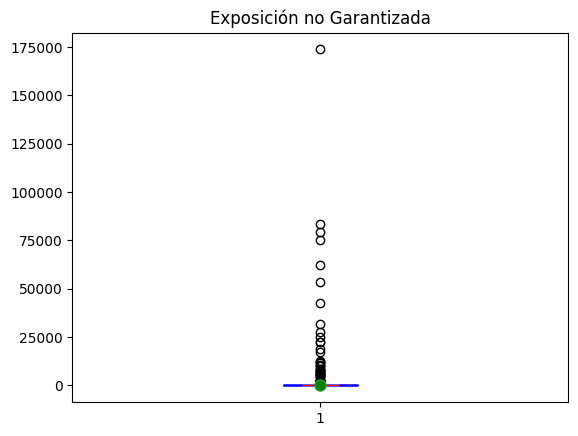

In [18]:
# Reprensentamos un boxplot para tener una visión de los valoes nulos
x = external['max_unsec_exposure_inPct'].dropna()

plt.boxplot(x, 
            notch=True, 
            patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'), 
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red'),
            showmeans=True, 
            meanprops=dict(marker='o', markerfacecolor='green', markersize=8))
plt.title('Exposición no Garantizada')
plt.show()

In [19]:
# Se elimina la variable
external = external.drop(['max_unsec_exposure_inPct'], axis=1)

**max_deliq_6mts //
max_deliq_12mts**

In [20]:
# La correlación es fuerte y positiva, además el p-valor es menor de 0.5 por lo que la correlación es significativa
max_del1 = external[external['max_delinquency_level'].notna()]


KeyError: 'max_delinquency_level'

In [ ]:

corr, p_value = pearsonr(max_del1['max_delinquency_level'], max_del1['max_recent_level_of_deliq'])
print(f"Correlación de Pearson: {corr:.2f}, P-valor: {p_value:.4f}")

<Axes: xlabel='max_deliq_6mts', ylabel='Count'>

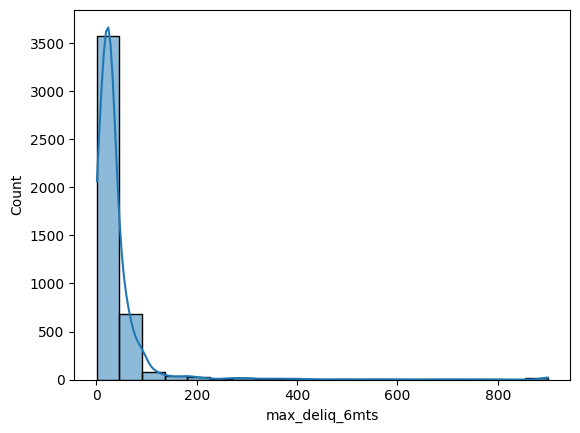

In [87]:
_ = external[external['max_deliq_6mts'] > 0].dropna()

sns.histplot(data = _, x = 'max_deliq_6mts', bins = 20, kde=True)

<Axes: xlabel='max_deliq_6mts', ylabel='Count'>

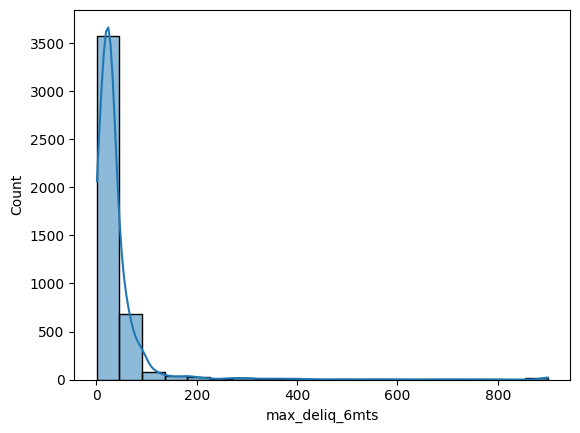

In [88]:
_ = external[external['max_deliq_6mts'] > 0].dropna()

sns.histplot(data = _, x = 'max_deliq_6mts', bins = 20, kde=True)